# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
!pip install citipy

In [41]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [43]:

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
City_Name=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

In [45]:
units = "imperial"

#query_url = f"{base_url}appid={weather_api_key}&units={units}&q=Detroit"
#response = requests.get(query_url).json()
#pprint(response)


{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 42.3314, 'lon': -83.0458},
 'dt': 1619573116,
 'id': 4990729,
 'main': {'feels_like': 71.71,
          'humidity': 36,
          'pressure': 1008,
          'temp': 73.02,
          'temp_max': 78.8,
          'temp_min': 68},
 'name': 'Detroit',
 'sys': {'country': 'US',
         'id': 3806,
         'sunrise': 1619519548,
         'sunset': 1619569608,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 8.05}}


In [46]:
set_count = 1
record_count = 0
for i, city in enumerate (cities):
    if i % 50 == 0 and i >= 50:
        set_count = set_count +1
        record_count = 1
    print (f"Processing Record{record_count} of set {set_count} | {city}")
    record_count = record_count +1
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()

        
    try:
        City_Name.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
    except KeyError:  
        print ("City not found. Skipping...")
            
            

Processing Record0 of set 1 | severo-kurilsk
Processing Record1 of set 1 | biak
Processing Record2 of set 1 | amderma
City not found. Skipping...
Processing Record3 of set 1 | mahebourg
Processing Record4 of set 1 | hermanus
Processing Record5 of set 1 | vaini
Processing Record6 of set 1 | borama
City not found. Skipping...
Processing Record7 of set 1 | taolanaro
City not found. Skipping...
Processing Record8 of set 1 | djibo
Processing Record9 of set 1 | barrow
Processing Record10 of set 1 | busselton
Processing Record11 of set 1 | khatanga
Processing Record12 of set 1 | upernavik
Processing Record13 of set 1 | villa maria
Processing Record14 of set 1 | arraial do cabo
Processing Record15 of set 1 | mataura
Processing Record16 of set 1 | domanivka
Processing Record17 of set 1 | shevchenkove
Processing Record18 of set 1 | jamestown
Processing Record19 of set 1 | rikitea
Processing Record20 of set 1 | chhukha
City not found. Skipping...
Processing Record21 of set 1 | norman wells
Proces

Processing Record44 of set 4 | kieta
Processing Record45 of set 4 | flinders
Processing Record46 of set 4 | burica
City not found. Skipping...
Processing Record47 of set 4 | bethel
Processing Record48 of set 4 | tuban
Processing Record49 of set 4 | dongkan
Processing Record50 of set 4 | sorong
Processing Record1 of set 5 | iracoubo
Processing Record2 of set 5 | hasaki
Processing Record3 of set 5 | hihifo
City not found. Skipping...
Processing Record4 of set 5 | bredasdorp
Processing Record5 of set 5 | bengkulu
Processing Record6 of set 5 | college
Processing Record7 of set 5 | mehran
Processing Record8 of set 5 | dawson creek
Processing Record9 of set 5 | tual
Processing Record10 of set 5 | chegutu
Processing Record11 of set 5 | eureka
Processing Record12 of set 5 | kholodnyy
Processing Record13 of set 5 | hambantota
Processing Record14 of set 5 | saint george
Processing Record15 of set 5 | ketchikan
Processing Record16 of set 5 | selma
Processing Record17 of set 5 | sitka
Processing R

Processing Record32 of set 8 | makinsk
Processing Record33 of set 8 | esperance
Processing Record34 of set 8 | lucea
Processing Record35 of set 8 | lodja
Processing Record36 of set 8 | enid
Processing Record37 of set 8 | srednekolymsk
Processing Record38 of set 8 | harrison
Processing Record39 of set 8 | kaitong
Processing Record40 of set 8 | almaznyy
Processing Record41 of set 8 | ca mau
Processing Record42 of set 8 | shorapur
Processing Record43 of set 8 | tromso
Processing Record44 of set 8 | arlit
Processing Record45 of set 8 | ancud
Processing Record46 of set 8 | pontianak
Processing Record47 of set 8 | anito
Processing Record48 of set 8 | juneau
Processing Record49 of set 8 | yima
Processing Record50 of set 8 | galesong
Processing Record1 of set 9 | kautokeino
Processing Record2 of set 9 | novikovo
Processing Record3 of set 9 | marzuq
Processing Record4 of set 9 | sisimiut
Processing Record5 of set 9 | antofagasta
Processing Record6 of set 9 | buchanan
Processing Record7 of set 9

Processing Record24 of set 12 | gizo
Processing Record25 of set 12 | sistranda
Processing Record26 of set 12 | maragogi
Processing Record27 of set 12 | west plains
Processing Record28 of set 12 | steinbach
Processing Record29 of set 12 | iki-burul
Processing Record30 of set 12 | alabaster
Processing Record31 of set 12 | conde
Processing Record32 of set 12 | jumla
Processing Record33 of set 12 | eldikan
City not found. Skipping...
Processing Record34 of set 12 | kirovsk
Processing Record35 of set 12 | turangi
Processing Record36 of set 12 | vila velha
Processing Record37 of set 12 | portales
Processing Record38 of set 12 | qaqortoq
Processing Record39 of set 12 | jujuy
City not found. Skipping...
Processing Record40 of set 12 | rosarito
Processing Record41 of set 12 | saint-joseph
Processing Record42 of set 12 | fairmont
Processing Record43 of set 12 | ellisras
Processing Record44 of set 12 | gobabis
Processing Record45 of set 12 | lavrentiya
Processing Record46 of set 12 | vung tau
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
weather_dict ={"City":City_Name,
"Lat":Lat,
"Lng":Lng,
"Max Temp":Max_Temp,
"Humidity":Humidity,
"Cloudiness":Cloudiness,
"Wind Speed":Wind_Speed,
"Country":Country,
"Date":Date}

weather_df=pd.DataFrame(weather_dict)
weather_df.head()
weather_df.to_csv(output_data_file,index = True)

In [48]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.720686,16.310605,60.192734,70.571429,52.805996,6.866102,1.619573e+09
std,33.570461,89.017789,19.233620,22.477349,40.713657,4.611067,7.779627e+01
min,-54.800000,-175.200000,7.860000,7.000000,0.000000,0.200000,1.619573e+09
25%,-8.362250,-58.693500,44.600000,60.000000,6.000000,3.440000,1.619573e+09
50%,22.690600,23.041200,63.000000,77.000000,66.000000,5.750000,1.619573e+09
75%,49.577850,91.087600,77.000000,87.500000,95.000000,9.730000,1.619573e+09
max,78.218600,179.316700,92.350000,100.000000,100.000000,24.160000,1.619573e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
#  Get the indices of cities that have humidity over 100%.


In [50]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

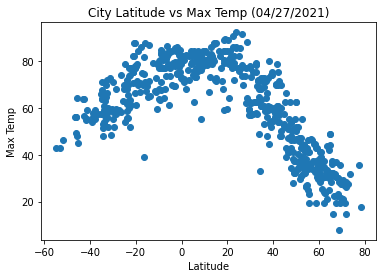

In [51]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('City Latitude vs Max Temp (04/27/2021)')
plt.show()

## Latitude vs. Humidity Plot

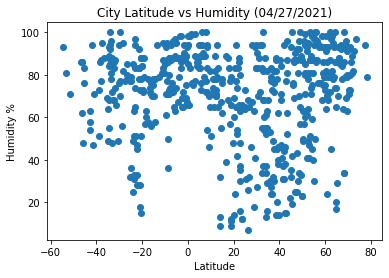

In [52]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs Humidity (04/27/2021)')
plt.show()

## Latitude vs. Cloudiness Plot

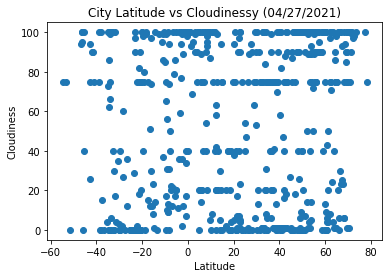

In [53]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudinessy (04/27/2021)')
plt.show()

## Latitude vs. Wind Speed Plot

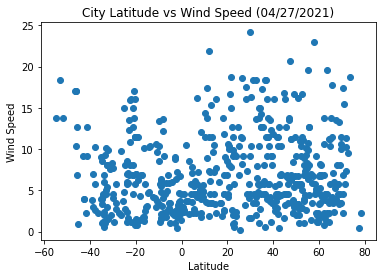

In [54]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (04/27/2021)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7950612791246415


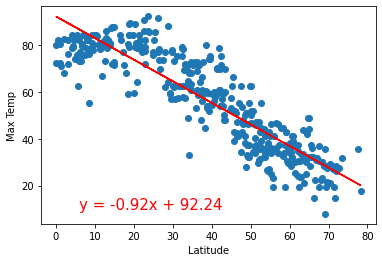

In [55]:
weather_df = pd.DataFrame(weather_dict)
northern_hemi_df = weather_df.loc[(weather_df["Lat"] >= 0)]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()


#Northen Hemisphere (greater than or equal to 0 degrees latitude <= 0 degrees)
#Southern Hemisphere (less than 0 degrees latitude >= 0 degrees)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5237498992145341


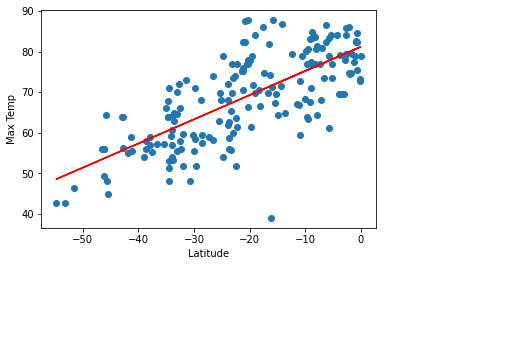

In [62]:
weather_df = pd.DataFrame(weather_dict)
southern_hemi_df = weather_df.loc[(weather_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011176210596062578


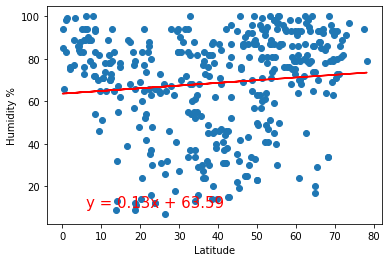

In [56]:
weather_df = pd.DataFrame(weather_dict)
northern_hemi_df = weather_df.loc[(weather_df["Lat"] >= 0)]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015869784878414155


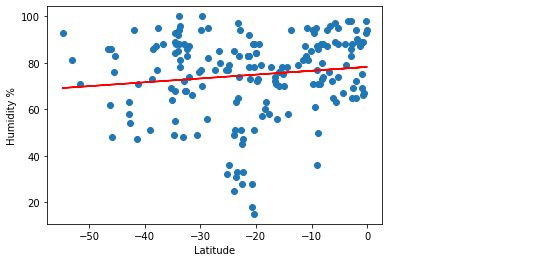

In [57]:
weather_df = pd.DataFrame(weather_dict)
southern_hemi_df = weather_df.loc[(weather_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008849279104886152


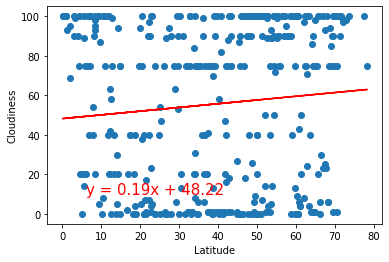

In [58]:
weather_df = pd.DataFrame(weather_dict)
northern_hemi_df = weather_df.loc[(weather_df["Lat"] >= 0)]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002360277097378768


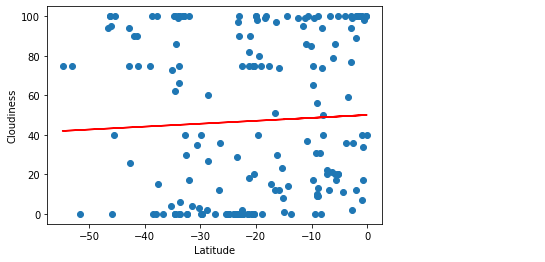

In [59]:
weather_df = pd.DataFrame(weather_dict)
southern_hemi_df = weather_df.loc[(weather_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0001377555723613746


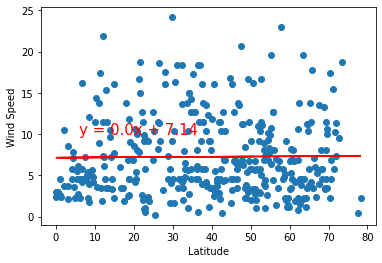

In [60]:
weather_df = pd.DataFrame(weather_dict)
northern_hemi_df = weather_df.loc[(weather_df["Lat"] >= 0)]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07830953999471017


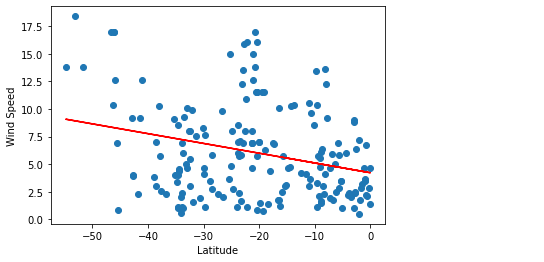

In [61]:
weather_df = pd.DataFrame(weather_dict)
southern_hemi_df = weather_df.loc[(weather_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()